## Laboratorium 6

### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab[xx].ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```



### Zadanie 1

* Wybierz 10 pierwszych gatunków liści (będziesz je używać w kolejnych zadaniach), o identyfikatorach: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.
* Znormalizuj dane w zakresie 0-1.
* Zgodnie z wynikami uzyskanymi w poprzednim laboratorium wybierz $n$ najlepszych cech.
* Wykonaj klasyfikację za pomocą algorytmu najbliższej średniej (dowolnego wariantu, ale korzystaj z tego samego w kolejnym zadaniu) i wyświetl dokładność klasyfikacji.

### Zadanie 2
* Przeprowadź klasteryzację zbioru za pomocą algorytmu [$k$-średnich](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).
* Korzystając z metody łokcia, wybierz liczbę klastrów ($c$).
* Podziel zbiór na $c$ klastrów (utwórz także mapowanie nowych etykiet na stare, np. za pomocą słownika)
* Wykonaj klasyfikację za pomocą algorytmu najbliższej średniej.
* Porównaj wynik z poprzednim zadaniem (powinien się poprawic) i wyświetl dokładność klasyfikacji.




In [1]:
import numpy as np


with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

classes = np.arange(1, 11)
X_train = train[np.isin(train[:, 0], classes)]
X_test = test[np.isin(test[:, 0], classes)]

y_train = X_train[:,0]
y_test = X_test[:,0]
X_train = scaler.fit_transform(X_train[:,2:])
X_test = scaler.transform(X_test[:,2:])


In [30]:
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score

selector = SelectKBest(k=6)
selector.fit_transform(X_train, y_train)

X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

neigh = NearestCentroid()
neigh.fit(X_train, y_train)
y_pred_nm = neigh.predict(X_test)

accuracy_nm = accuracy_score(y_test, y_pred_nm)
print(f'NM accuracy: {accuracy_nm}')

NM accuracy: 0.7756286266924565


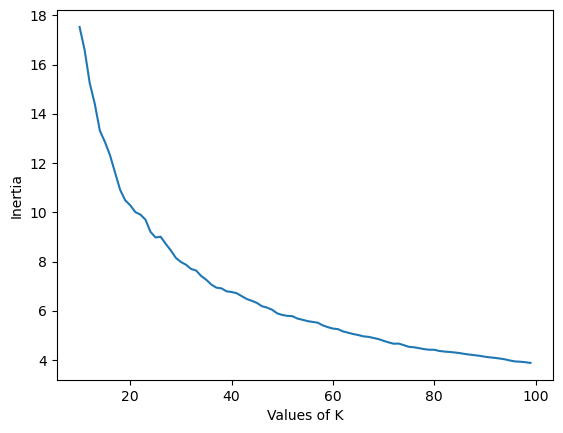

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

i_list = range(10,100)
inertia_list = []

for i in i_list:
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=0)
    kmeans.fit(X_train, y_train)
    inertia = kmeans.inertia_
    inertia_list.append(inertia)


plt.plot(i_list, inertia_list)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()
# Ok. 50

In [47]:
K = 50

kmeans2 = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(X_train)
kmeans2.fit(X_train, y_train)
y_new = kmeans2.labels_
y_pred = kmeans2.predict(X_test)

new_y_dict = dict(zip(y_new, y_train))

y_pred_mapped = [new_y_dict[i] for i in y_pred]
accuracy = accuracy_score(y_pred_mapped, y_test)
print(f'KMeans accuracy: {accuracy}')

KMeans accuracy: 0.7504835589941973
